In [409]:
import pandas as pd
import matplotlib
import seaborn as sns
import re
import numpy as np
import os
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [134]:
data_root = './data/nyc_high_schools'
data_files = ['hs_directory.csv', 'ap_scores.csv', 'class_size.csv', 'enrollment.csv', 'graduation.csv', 'sat_results.csv', 'school_attendance.csv']


# load the data
data = {}
for data_file in data_files:
    data_name = os.path.splitext(data_file)[0]
    data_path = os.path.join(os.path.abspath(data_root), data_file)
    data[data_name] = pd.read_csv(data_path)

In [135]:
ap_scores = data['ap_scores']
ap_scores.head()

DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s

In [136]:
ap_scores[ap_scores['DBN'] == '04M610']

DBN                                         SchoolName AP Test Takers   \
51  04M610  THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...              41   
52  04M610                       YOUNG WOMEN'S LEADERSHIP SCH               s   

   Total Exams Taken Number of Exams with scores 3 4 or 5  
51                55                                   29  
52                 s                                    s

In [137]:
# remove duplicates DBN in ap_scores
ap_scores.drop(52, inplace=True)
data['ap_scores'] = ap_scores

In [138]:
graduation = data['graduation']
graduation.head()

Demographic     DBN                            School Name    Cohort  \
0  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2003   
1  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2004   
2  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2005   
3  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2006   
4  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL  2006 Aug   

   Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
0             5               s                         s                 s   
1            55              37                     67.3%                17   
2            64              43                     67.2%                27   
3            78              43                     55.1%                36   
4            78              44                     56.4%                37   

  Total Regents - % of cohort Total Regents - % of grads  \
0                           s                          s   
1                       30.9%                      45.9%   
2                       42.2%                      62.8%   
3                       46.2%                      83.7%   
4                       47.4%                      84.1%   

             ...            Regents w/o Advanced - n  \
0            ...                                   s   
1            ...                                  17   
2            ...                                  27   
3            ...                                  36   
4            ...                                  37   

  Regents w/o Advanced - % of cohort Regents w/o Advanced - % of grads  \
0                                  s                                 s   
1                              30.9%                             45.9%   
2                              42.2%                             62.8%   
3                              46.2%                             83.7%   
4                              47.4%                             84.1%   

  Local - n Local - % of cohort   Local - % of grads Still Enrolled - n  \
0         s                   s                    s                  s   
1        20               36.4%                54.1%                 15   
2        16                 25%  37.200000000000003%                  9   
3         7                  9%                16.3%                 16   
4         7                  9%                15.9%                 15   

  Still Enrolled - % of cohort Dropped Out - n Dropped Out - % of cohort  
0                            s               s                         s  
1                        27.3%               3                      5.5%  
2                        14.1%               9                     14.1%  
3                        20.5%              11                     14.1%  
4                        19.2%              11                     14.1%  

[5 rows x 23 columns]

In [139]:
graduation.dtypes

Demographic                           object
DBN                                   object
School Name                           object
Cohort                                object
Total Cohort                           int64
Total Grads - n                       object
Total Grads - % of cohort             object
Total Regents - n                     object
Total Regents - % of cohort           object
Total Regents - % of grads            object
Advanced Regents - n                  object
Advanced Regents - % of cohort        object
Advanced Regents - % of grads         object
Regents w/o Advanced - n              object
Regents w/o Advanced - % of cohort    object
Regents w/o Advanced - % of grads     object
Local - n                             object
Local - % of cohort                   object
Local - % of grads                    object
Still Enrolled - n                    object
Still Enrolled - % of cohort          object
Dropped Out - n                       object
Dropped Ou

In [140]:
# only keep 2006 data (latest year)
graduation = graduation[graduation["Cohort"] == '2006']
data['graduation'] = graduation

In [141]:
enrollment = data["enrollment"]
enrollment.head()

DBN                       Name  schoolyear fl_percent  frl_percent  \
0  01M015  P.S. 015 ROBERTO CLEMENTE    20052006       89.4          NaN   
1  01M015  P.S. 015 ROBERTO CLEMENTE    20062007       89.4          NaN   
2  01M015  P.S. 015 ROBERTO CLEMENTE    20072008       89.4          NaN   
3  01M015  P.S. 015 ROBERTO CLEMENTE    20082009       89.4          NaN   
4  01M015  P.S. 015 ROBERTO CLEMENTE    20092010                    96.5   

   total_enrollment prek   k grade1 grade2    ...     black_num black_per  \
0               281   15  36     40     33    ...            74      26.3   
1               243   15  29     39     38    ...            68      28.0   
2               261   18  43     39     36    ...            77      29.5   
3               252   17  37     44     32    ...            75      29.8   
4               208   16  40     28     32    ...            67      32.2   

  hispanic_num hispanic_per white_num white_per male_num male_per female_num  \
0          189         67.3         5       1.8    158.0     56.2      123.0   
1          153         63.0         4       1.6    140.0     57.6      103.0   
2          157         60.2         7       2.7    143.0     54.8      118.0   
3          149         59.1         7       2.8    149.0     59.1      103.0   
4          118         56.7         6       2.9    124.0     59.6       84.0   

  female_per  
0       43.8  
1       42.4  
2       45.2  
3       40.9  
4       40.4  

[5 rows x 38 columns]

In [142]:
enrollment.dtypes

DBN                   object
Name                  object
schoolyear             int64
fl_percent            object
frl_percent          float64
total_enrollment       int64
prek                  object
k                     object
grade1                object
grade2                object
grade3                object
grade4                object
grade5                object
grade6                object
grade7                object
grade8                object
grade9                object
grade10               object
grade11               object
grade12               object
ell_num              float64
ell_percent          float64
sped_num             float64
sped_percent         float64
ctt_num               object
selfcontained_num     object
asian_num              int64
asian_per            float64
black_num              int64
black_per            float64
hispanic_num           int64
hispanic_per         float64
white_num              int64
white_per            float64
male_num      

In [143]:
# only keep 20112012
enrollment = enrollment[enrollment["schoolyear"] == 20112012]
data['enrollment'] = enrollment

In [144]:
enrollment.describe()

schoolyear  frl_percent  total_enrollment      ell_num  ell_percent  \
count      1509.0  1509.000000       1509.000000  1509.000000  1509.000000   
mean   20112012.0    69.383963        644.081511    93.620278    14.312194   
std           0.0    20.335017        531.246795   129.374135    15.310935   
min    20112012.0     3.700000         43.000000     0.000000     0.000000   
25%    20112012.0    60.000000        349.000000    20.000000     4.500000   
50%    20112012.0    73.900000        516.000000    46.000000     9.600000   
75%    20112012.0    84.400000        769.000000   118.000000    19.000000   
max    20112012.0   100.000000       5332.000000  1229.000000    97.600000   

          sped_num  sped_percent    asian_num    asian_per    black_num  \
count  1509.000000   1509.000000  1509.000000  1509.000000  1509.000000   
mean     90.699801     15.154539   103.483101    11.562425   178.845593   
std      71.613468      6.511198   229.669822    17.204374   197.975310   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%      49.000000     11.100000     4.000000     1.100000    47.000000   
50%      77.000000     14.800000    17.000000     3.800000   115.000000   
75%     113.000000     19.100000    93.000000    13.500000   237.000000   
max     751.000000     49.000000  3214.000000    93.300000  1468.000000   

         black_per  hispanic_num  hispanic_per    white_num    white_per  \
count  1509.000000   1509.000000   1509.000000  1509.000000  1509.000000   
mean     33.289993    259.861498     41.844665    95.864148    12.279324   
std      28.324653    262.883861     25.876951   202.540678    19.364678   
min       0.000000      5.000000      1.400000     0.000000     0.000000   
25%       8.800000     83.000000     18.200000     4.000000     1.000000   
50%      26.000000    188.000000     38.600000    13.000000     2.500000   
75%      53.100000    338.000000     64.200000    84.000000    14.500000   
max      96.400000   2478.000000    100.000000  3181.000000    93.600000   

          male_num     male_per   female_num   female_per  
count  1509.000000  1509.000000  1509.000000  1509.000000  
mean    327.345924    50.651160   316.734924    49.348575  
std     282.101941     8.321592   262.268061     8.321307  
min       0.000000     0.000000     0.000000     0.000000  
25%     170.000000    48.500000   168.000000    46.600000  
50%     262.000000    50.900000   257.000000    49.100000  
75%     391.000000    53.400000   383.000000    51.500000  
max    3106.000000   100.000000  2315.000000   100.000000

In [145]:
sat_results = data['sat_results']
sat_results.head()

DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    384

In [146]:
sat_results.describe()

DBN                       SCHOOL NAME Num of SAT Test Takers  \
count      478                               478                    478   
unique     478                               478                    175   
top     06M348  BROOKLYN HIGH SCHOOL OF THE ARTS                      s   
freq         1                                 1                     57   

       SAT Critical Reading Avg. Score SAT Math Avg. Score  \
count                              478                 478   
unique                             164                 173   
top                                  s                   s   
freq                                57                  57   

       SAT Writing Avg. Score  
count                     478  
unique                    163  
top                         s  
freq                       57

In [147]:
sat_results.dtypes

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

In [148]:
class_size = data['class_size']
class_size.head()

CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   
2                           -                               17.0   
3                           -                               17.0   
4                           -                               15.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   
1                 1.0                21.0                    21.0   
2                 1.0                17.0                    17.0   
3                 1.0                17.0                    17.0   
4                 1.0                15.0                    15.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  
0                   19.0         ATS                             NaN  
1                   21.0         ATS                             NaN  
2                   17.0         ATS                             NaN  
3                   17.0         ATS                             NaN  
4                   15.0         ATS                             NaN

In [149]:
class_size['GRADE'] = class_size['GRADE ']
class_size.drop('GRADE ', axis=1, inplace=True)
data['class_size'] = class_size

In [150]:
class_size['GRADE'].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [151]:
# only keep high school
class_size = class_size[class_size['GRADE'] == '09-12']

In [152]:
class_size.describe()

CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
count  10644.000000                       10644.000000        10644.000000   
mean      14.502537                         127.193442            4.945039   
std        9.245007                         209.920028            7.103117   
min        1.000000                           5.000000            1.000000   
25%        7.000000                          31.000000            1.000000   
50%       13.000000                          64.000000            3.000000   
75%       22.000000                         128.000000            5.000000   
max       32.000000                        2965.000000          100.000000   

       AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
count        10644.000000            10644.000000           10644.000000   
mean            23.729472               19.975197              26.761180   
std              6.870563                7.343657               7.915786   
min              5.000000                5.000000               5.000000   
25%             19.500000               14.000000              22.000000   
50%             24.700000               20.000000              28.000000   
75%             29.000000               26.000000              33.000000   
max             95.000000               95.000000              96.000000   

       SCHOOLWIDE PUPIL-TEACHER RATIO  
count                             0.0  
mean                              NaN  
std                               NaN  
min                               NaN  
25%                               NaN  
50%                               NaN  
75%                               NaN  
max                               NaN

In [153]:
attendance = data['school_attendance']
attendance.head()

District YTD % Attendance (Avg)  YTD Enrollment(Avg)
0  DISTRICT 01                 91.18%                12367
1  DISTRICT 02                 89.01%                60823
2  DISTRICT 03                 89.28%                21962
3  DISTRICT 04                 91.13%                14252
4  DISTRICT 05                 89.08%                13170

In [154]:
attendance.dtypes

District                  object
YTD % Attendance (Avg)    object
YTD Enrollment(Avg)        int64
dtype: object

In [155]:
attendance['District'].unique()

array(['DISTRICT 01', 'DISTRICT 02', 'DISTRICT 03', 'DISTRICT 04',
       'DISTRICT 05', 'DISTRICT 06', 'DISTRICT 07', 'DISTRICT 08',
       'DISTRICT 09', 'DISTRICT 10', 'DISTRICT 11', 'DISTRICT 12',
       'DISTRICT 13', 'DISTRICT 14', 'DISTRICT 15', 'DISTRICT 16',
       'DISTRICT 17', 'DISTRICT 18', 'DISTRICT 19', 'DISTRICT 20',
       'DISTRICT 21', 'DISTRICT 22', 'DISTRICT 23', 'DISTRICT 24',
       'DISTRICT 25', 'DISTRICT 26', 'DISTRICT 27', 'DISTRICT 28',
       'DISTRICT 29', 'DISTRICT 30', 'DISTRICT 31', 'DISTRICT 32',
       'SPECIAL ED DISTRICT 75', 'ALTERNATIVE HIGH SCHOOLS', 'Citywide'], dtype=object)

In [156]:
# read in surveys
d75_survey = pd.read_table('./data/nyc_high_schools/masterfile11_d75_final.txt', delimiter='\t', encoding='windows-1252')
all_survey = pd.read_table('./data/nyc_high_schools/masterfile11_gened_final.txt', delimiter='\t', encoding='windows-1252')

In [157]:
survey = pd.concat([d75_survey, all_survey], axis=0)

In [158]:
survey.head()

N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0  244.0    8.0  81.0       8.5       6.3       6.4         7.1  K004   
1  115.0   97.0  43.0       8.8       7.7       7.2         7.9  K036   
2  189.0  131.0  75.0       8.1       8.5       8.0         8.2  K053   
3  150.0   70.0  52.0       8.9       8.8       6.3         8.0  K077   
4  117.0   69.0  45.0       8.3       7.3       6.0         7.2  K140   

   com_p_11  com_s_11   ...    t_q8c_1  t_q8c_2  t_q8c_3 t_q8c_4  t_q9  \
0       8.6       5.8   ...       38.0     55.0      6.0     1.0   5.4   
1       8.7       6.9   ...       38.0     50.0      8.0     5.0   1.6   
2       8.1       7.7   ...       46.0     49.0      3.0     1.0   4.5   
3       8.7       8.3   ...       28.0     50.0     16.0     6.0   5.6   
4       8.2       6.1   ...       30.0     45.0     15.0    10.0   2.3   

   t_q9_1  t_q9_2  t_q9_3  t_q9_4  t_q9_5  
0    13.0    31.0    27.0    22.0     8.0  
1    60.0    30.0     5.0     3.0     3.0  
2    25.0    28.0    21.0    18.0     7.0  
3    24.0    14.0    26.0    32.0     4.0  
4    55.0    21.0    12.0     7.0     5.0  

[5 rows x 2773 columns]

In [159]:
survey.columns.tolist()

['N_p',
 'N_s',
 'N_t',
 'aca_p_11',
 'aca_s_11',
 'aca_t_11',
 'aca_tot_11',
 'bn',
 'com_p_11',
 'com_s_11',
 'com_t_11',
 'com_tot_11',
 'd75',
 'dbn',
 'eng_p_11',
 'eng_s_11',
 'eng_t_11',
 'eng_tot_11',
 'highschool',
 'nr_p',
 'nr_s',
 'nr_t',
 'p_N_q10a',
 'p_N_q10a_1',
 'p_N_q10a_2',
 'p_N_q10a_3',
 'p_N_q10a_4',
 'p_N_q10a_5',
 'p_N_q10b',
 'p_N_q10b_1',
 'p_N_q10b_2',
 'p_N_q10b_3',
 'p_N_q10b_4',
 'p_N_q10b_5',
 'p_N_q10c',
 'p_N_q10c_1',
 'p_N_q10c_2',
 'p_N_q10c_3',
 'p_N_q10c_4',
 'p_N_q10c_5',
 'p_N_q10d',
 'p_N_q10d_1',
 'p_N_q10d_2',
 'p_N_q10d_3',
 'p_N_q10d_4',
 'p_N_q10d_5',
 'p_N_q10e',
 'p_N_q10e_1',
 'p_N_q10e_2',
 'p_N_q10e_3',
 'p_N_q10e_4',
 'p_N_q10e_5',
 'p_N_q10f',
 'p_N_q10f_1',
 'p_N_q10f_2',
 'p_N_q10f_3',
 'p_N_q10f_4',
 'p_N_q10f_5',
 'p_N_q10g',
 'p_N_q10h',
 'p_N_q10i',
 'p_N_q10j',
 'p_N_q10k',
 'p_N_q10l',
 'p_N_q11a_1',
 'p_N_q11a_2',
 'p_N_q11a_3',
 'p_N_q11a_4',
 'p_N_q11a_5',
 'p_N_q11b_1',
 'p_N_q11b_2',
 'p_N_q11b_3',
 'p_N_q11b_4',
 'p_N_q1

In [160]:
survey['DBN'] = survey['dbn']
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey[survey_fields]
data['survey'] = survey

In [162]:
hs_directory = data['hs_directory']
hs_directory.head()

DBN Boro    BN Building Code School_Phone_Number    Fax_Number  \
0  01M292    M  M292          M056        212-406-9411  212-406-9417   
1  01M448    M  M448          M446        212-962-4341  212-267-5611   
2  01M450    M  M450          M060        212-460-8467  212-260-9657   
3  01M509    M  M509          M025        212-473-8152  212-475-7588   
4  01M539    M  M539          M022        212-677-5190  212-260-8124   

                                        Printed_Name  \
0      Henry Street School for International Studies   
1                University Neighborhood High School   
2                         East Side Community School   
3                            Marta Valle High School   
4  New Explorations into Science, Technology and ...   

                                Alphabetic_Name_Long grade span 2014-2015 min  \
0      Henry Street School for International Studies                        6   
1                University Neighborhood High School                        9   
2                         East Side Community School                        6   
3                            Marta Valle High School                        9   
4  New Explorations into Science, Technology and ...                       0K   

   grade span 2014-2015 max  \
0                        12   
1                        12   
2                        12   
3                        12   
4                        12   

                         ...                         postalCode  precinct  \
0                        ...                              10002         7   
1                        ...                              10002         7   
2                        ...                              10009         9   
3                        ...                              10002         7   
4                        ...                              10002         7   

   school_district   latitude  longitude                              loc  \
0                1  40.713481 -73.985321  [-73.98532120000002,40.7134809]   
1                1  40.712235 -73.983823           [-73.983823,40.712235]   
2                1  40.729846 -73.983151         [-73.9831511,40.7298459]   
3                1  40.720555 -73.985684         [-73.9856836,40.7205546]   
4                1  40.719493 -73.979151         [-73.9791505,40.7194927]   

            @context   @type  \
0  http://schema.org  School   
1  http://schema.org  School   
2  http://schema.org  School   
3  http://schema.org  School   
4  http://schema.org  School   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/School/hen...   
1  http://nyc.pediacities.com/Resource/School/uni...   
2  http://nyc.pediacities.com/Resource/School/eas...   
3  http://nyc.pediacities.com/Resource/School/mar...   
4  http://nyc.pediacities.com/Resource/School/new...   

                                          Location 1  
0  220 Henry Street\nNew York, NY 10002\n(40.7134...  
1  200 Monroe Street\nNew York, NY 10002\n(40.712...  
2  420 East 12 Street\nNew York, NY 10009\n(40.72...  
3  145 Stanton Street\nNew York, NY 10002\n(40.72...  
4  111 Columbia Street\nNew York, NY 10002\n(40.7...  

[5 rows x 71 columns]

In [171]:
def pad_csd(val):
    str_val = str(val)
    if len(str_val) == 1:
        return "0" + str_val
    else:
        return str_val

class_size.loc["padded_csd"] = class_size["CSD"].apply(pad_csd)

/Users/samouzegar/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [175]:
class_size["DBN"] = class_size["padded_csd"] + class_size["SCHOOL CODE"]

/Users/samouzegar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [176]:
data["class_size"] = class_size

In [184]:
# convert to numeric
sat_results.dtypes

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

In [185]:
sat_results["SAT Critical Reading Avg. Score"] = pd.to_numeric?

In [186]:
sat_results["SAT Critical Reading Avg. Score"] = pd.to_numeric(sat_results["SAT Critical Reading Avg. Score"], errors="coerce")
sat_results["SAT Math Avg. Score"] = pd.to_numeric(sat_results["SAT Math Avg. Score"], errors="coerce")
sat_results["SAT Writing Avg. Score"] = pd.to_numeric(sat_results["SAT Writing Avg. Score"], errors="coerce")

In [188]:
sat_results['total_score'] = sat_results['SAT Critical Reading Avg. Score'] + sat_results['SAT Math Avg. Score'] + sat_results['SAT Writing Avg. Score']

In [408]:
def get_lat(loc):
    lat = loc.split(",")[-1].replace("[", "")
    return lat
def get_lon(loc):
    lon = loc.split(",")[0].replace("]", "")
    return lon

hs_directory["lat"] = hs_directory["loc"].apply(get_lat)
hs_directory["lon"] = hs_directory["loc"].apply(get_lon)

In [197]:
hs_directory["lat"] = pd.to_numeric(hs_directory["lat"], errors="coerce")
hs_directory["lan"] = pd.to_numeric(hs_directory["lon"], errors="coerce")

In [202]:
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

In [208]:
# take average of values in class size
class_size = class_size.groupby("DBN").agg(np.mean)

In [210]:
class_size.reset_index(inplace=True)

In [211]:
data["class_size"] = class_size

In [214]:
graduation = graduation[graduation["Demographic"] == 'Total Cohort']

In [215]:
data['graduation'] = graduation

In [222]:
# convert ap scores to numeric
ap_cols_to_convert = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in ap_cols_to_convert:
    ap_scores[col] = pd.to_numeric(ap_scores[col], errors='coerce')

In [231]:
# combine all data sets.
# we keep all sat scores since that is the main point of this analysis
combined = sat_results

In [232]:
# left merge with ap scores and graduation
combined = combined.merge(ap_scores, on="DBN", how="left")

In [245]:
combined = combined.merge(graduation, on="DBN", how="left")

In [250]:
# inner merge with class size
combined = combined.merge(class_size, on="DBN", how="inner")

In [253]:
# inner merge with demographics
combined = combined.merge(enrollment, on="DBN", how="inner")

In [255]:
# inner merge with survey
combined = combined.merge(survey, on="DBN", how="inner")

In [265]:
# inner merge with directory
combined = combined.merge(hs_directory, on="DBN", how="inner")

In [288]:
def get_district_id(district):
    district_int = district.split()[-1]
    if district_int.isdigit():
        return int(district_int)
    else:
        return 0

    
attendance['district_id'] = attendance["District"].apply(get_district_id)
attendance.drop(attendance[attendance['district_id'] == 0].index, inplace=True)

In [297]:
combined = combined.merge(attendance, left_on='school_district', right_on='district_id', how='inner')

In [314]:
combined.fillna(combined.mean(), inplace=True);

In [322]:
combined.fillna(0, inplace=True)

In [350]:
# find correlations
corr = combined.corr()
sig_corr = corr > 0.5
for row, columns in sig_corr.iteritems():
    print("Strong correlation between {} and:".format(row))
    print(', '.join(x for x in columns[columns == True].index.tolist()))
    print("\n")

Strong correlation between SAT Critical Reading Avg. Score and:
SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, total_score, white_per


Strong correlation between SAT Math Avg. Score and:
SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, total_score, AP Test Takers , Total Exams Taken, asian_num, asian_per, white_per


Strong correlation between SAT Writing Avg. Score and:
SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, total_score, AP Test Takers , asian_per, white_per


Strong correlation between total_score and:
SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, total_score, AP Test Takers , Total Exams Taken, asian_per, white_per


Strong correlation between AP Test Takers  and:
SAT Math Avg. Score, SAT Writing Avg. Score, total_score, AP Test Takers , Total Exams Taken, Number of Exams with scores 3 4 or 5, Total Cohort, NUMBER OF STUDENTS / SEATS FILLED, NUMBER OF S

In [354]:
corr['total_score'].sort_values(ascending=False)

total_score                             1.000000
SAT Writing Avg. Score                  0.987773
SAT Critical Reading Avg. Score         0.986748
SAT Math Avg. Score                     0.972497
white_per                               0.621945
asian_per                               0.571554
AP Test Takers                          0.525231
Total Exams Taken                       0.516389
asian_num                               0.476350
Number of Exams with scores 3 4 or 5    0.465100
white_num                               0.450392
N_s                                     0.423982
N_p                                     0.423410
NUMBER OF STUDENTS / SEATS FILLED       0.395789
Total Student 10/26                     0.389362
female_num                              0.387765
AVERAGE CLASS SIZE                      0.380110
total_enrollment                        0.367867
NUMBER OF SECTIONS                      0.364004
saf_s_11                                0.346713
aca_s_11            

In [368]:
combined["high_ap_score_ratio"] = combined["Number of Exams with scores 3 4 or 5"] / combined["Total Exams Taken"]

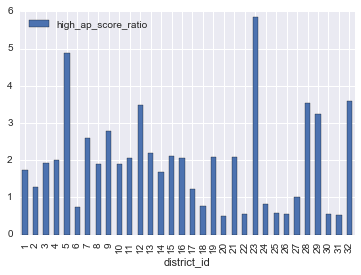

In [370]:
combined.groupby('district_id').agg(np.mean).reset_index().plot.bar('district_id', 'high_ap_score_ratio')

In [380]:
combined_filtered = combined[combined["Number of Exams with scores 3 4 or 5"] != 153.45]

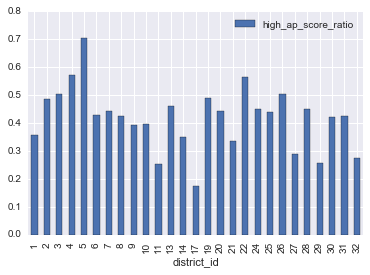

In [381]:
combined_filtered.groupby('district_id').agg(np.mean).reset_index().plot.bar('district_id', 'high_ap_score_ratio')

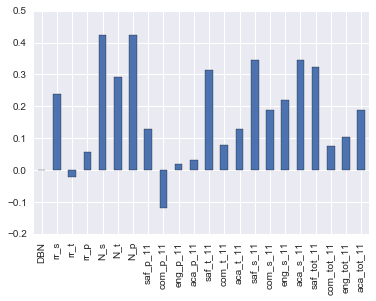

In [399]:
# correlation between total score and survey fields
combined.corr().loc["total_score", survey_fields].plot.bar()

We can see that there is a high correlation between sat score and N which is count of students, teachers, parents. This makes sense that a larger sample size may correlate with higher sat scores.
There is a high correlation between how students rank the safety of the school and sat scores. A safer school allows for higher scores? If students feel comfortable and safe in the environment, they are more likely to learn and thus score better on the test.
It is interesting that while for students there is a high correlation between academic standards and sat scores, this is not true between how parents or teachers perceive academic standards.

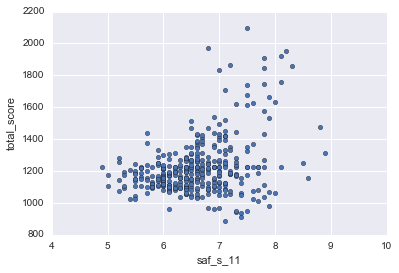

In [402]:
# we make a scatter plot of saf_s_11 and sat scores
combined.plot.scatter('saf_s_11', 'total_score')

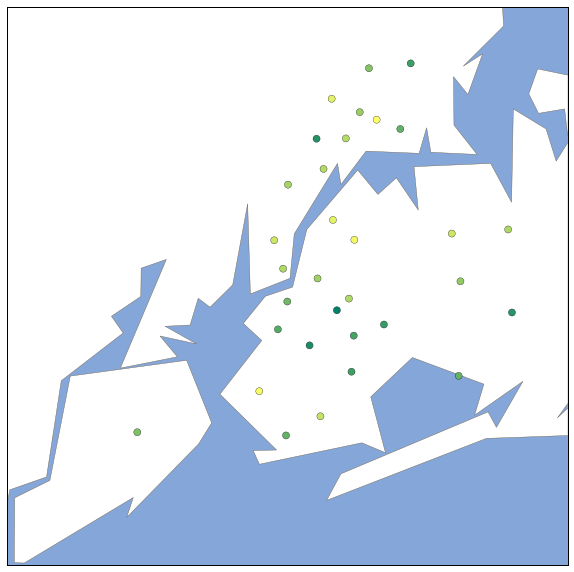

In [441]:
# Average safety score per school district
# Compute the average safety score for each district.
# Make a map that shows safety scores by district.
# Write a markdown cell of your conclusions about safety by area of New York City. You may want to read up on the boroughs of New York City.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 10))
district_data = combined.groupby('district_id').agg(np.mean)
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = district_data["longitude"].tolist()
latitudes = district_data["latitude"].tolist()
m.scatter(x=longitudes, y = latitudes, latlon=True, s=50, zorder=2, c=district_data['saf_s_11'], cmap='summer')
plt.show()

Looks like upper manhattan has lower safety scores. North of Queens and part of Bronx and lower Brooklyn have lower scores as well. However, most of the Brooklyn area has high safety scores.

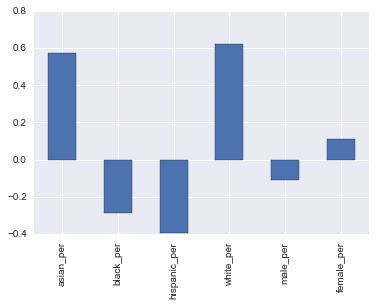

In [447]:
# Find correlations between race and sat score
race_cols = [col for col in combined.columns if re.match('.+_per$', col)]
combined.corr().loc['total_score', race_cols].plot.bar()

Pretty strong + correlation between asian and white percentage with sat score while there is a strong - correlation between hispanic and black percentage and their SAT scores.

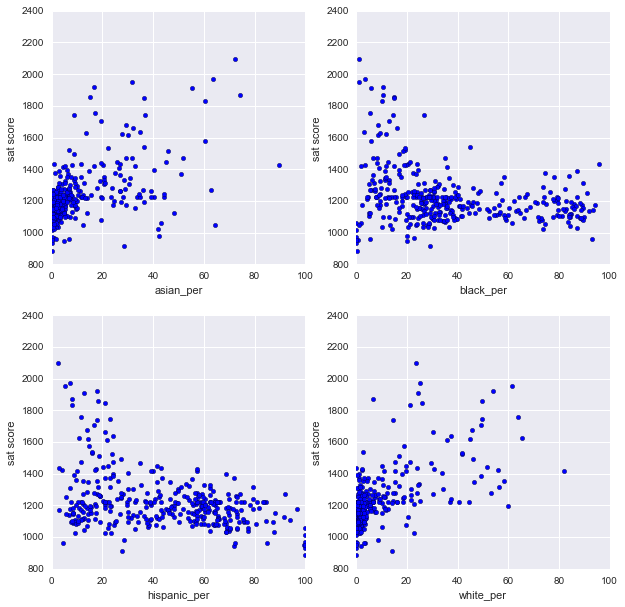

In [461]:
# scatter plots of sat score vs race
race_cols = ['asian_per', 'black_per', 'hispanic_per', 'white_per']
fig = plt.figure(figsize=(10, 10))

for idx, race in enumerate(race_cols):
    ax = fig.add_subplot(2, 2, idx+1)
    ax.scatter(combined[race], combined['total_score'])
    ax.set_xlim(0, 100)
    ax.set_ylim(800, 2400)
    ax.set_xlabel(race)
    ax.set_ylabel('sat score')

In [463]:
print(combined[(combined["hispanic_per"] < 10) & (combined["total_score"] > 1800)]["SCHOOL NAME"])
# private science tech schools prepare students better for the SAT. 

37                                STUYVESANT HIGH SCHOOL
150                         BRONX HIGH SCHOOL OF SCIENCE
185                       BROOKLYN TECHNICAL HIGH SCHOOL
325    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
354                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [467]:
print(combined[(combined["hispanic_per"] > 90)]["SCHOOL NAME"])
# International schools and schools geared towards ESL students. Naturally they would have lower SAT scores.

44                         MANHATTAN BRIDGES HIGH SCHOOL
79                      CITY COLLEGE ACADEMY OF THE ARTS
80               COMMUNITY HEALTH ACADEMY OF THE HEIGHTS
81      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
83     HIGH SCHOOL FOR INTERNATIONAL BUSINESS AND FIN...
88     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
124                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
140                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
252                            MULTICULTURAL HIGH SCHOOL
284               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


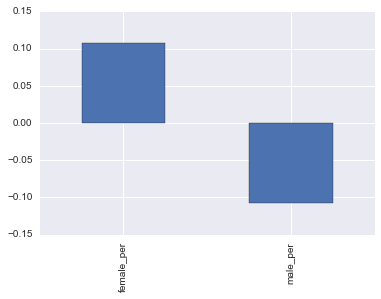

In [468]:
# Exploring gender and SAT Scores
gender_cols = ['female_per', 'male_per']
combined.corr().loc['total_score', gender_cols].plot.bar()

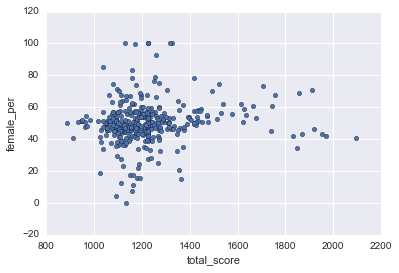

In [482]:
combined.plot.scatter('total_score', 'female_per')

In [485]:
#Research any schools with a greater than 60% female_per, and greater than 1700 average SAT score.
#Find the names of schools from the data.
#Use Wikipedia and Google to research the names of the schools.
#Is there anything interesting about these particular schools? Write up a markdown cell with your findings.
filtered_data = combined[(combined['female_per'] > 60) & (combined['total_score'] > 1700)]
filtered_data['SCHOOL NAME'].values

array(['BARD HIGH SCHOOL EARLY COLLEGE', 'ELEANOR ROOSEVELT HIGH SCHOOL',
       'BEACON HIGH SCHOOL',
       'FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS',
       'TOWNSEND HARRIS HIGH SCHOOL'], dtype=object)

These are mostly specialized schools so it would make sense that the score would be high. However, there may be another reason why these schools have more females than males. They are mostly liberal arts schools and more women tend to go into liberal arts.

In [488]:
# AP Scores versus SAT Scores
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

In [489]:
combined.corr().loc['total_score', 'ap_per']

0.060790118187349571

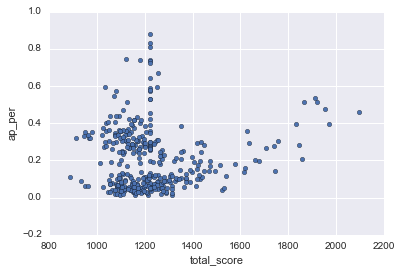

In [490]:
combined.plot.scatter('total_score', 'ap_per')

In [491]:
# The correlation is not at all strong. 